<a href="https://colab.research.google.com/github/blckpwdr50/datasciencecoursera/blob/master/TRAIN_HS_PD_Lab_12_%5BDaniel_Schaben%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 12: Introduction to Deep Neural Networks**
---


### **Description**
This lab focuses on building, visualizing, and training neural networks (NN) using the `keras` Python library. This will cover key topics such as:
* Network structure
* Hidden layers
* Layer types
* Activation functions
* Training neural networks

<br>

### **Lab Structure**
**Part 1**: [Building and Visualizing a NN](#p1)

**Part 2**: [Activation Functions](#p2)

**Part 3**: [Training](#p3)

**Part 4**: [Independent Work](#p4)



<br>

### **Goals**
By the end of this lab, you will:
* Learn how to build a Neural Network using keras including different sizes and numbers of layers, with different activation functions.
* Train and evaluate a Neural Network for regression.

<br>


### **Cheat Sheets**:
* [Deep Learning with keras](https://docs.google.com/document/d/1vc51G6X8ERimrVW6kuyIXNcumR-34-SNiUXA8IYK_1o/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**




In [ ]:
!pip install --quiet keras_visualizer
from keras.models import Sequential
from keras.layers import Dense, Input

from keras_visualizer import visualizer
from IPython.display import Image

from keras.datasets import boston_housing, reuters
from keras.optimizers import *
from keras.metrics import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<a name="p1"></a>

---
## **Part 1: Building and Visualizing a NN**
---

Let's start by familiarizing ourselves with keras and visualizing a neural network. In this part, we will focus on Steps #3 - 6:

1. Import and split the data into a train/test set
2. Determine the dimensions of the data
3. **Initialize the Network Model**
4. **Add an Input layer to the model**
5. **Add the hidden Layers to the model**
6. **Add the output layer**
7. Fit the model
8. Evaluate the model

### **Steps #3 - 4: Initialize Neural Net and Add Input Layer**

Intialize a neural network using `Sequential()` and add an input layer of size 8.

In [ ]:
model=Sequential()
model.add(Input(8))

### **Step #5: Add Hidden Layers**

Now, add two hidden layers such that:

* The first hidden layer has `10` neurons

* The second hidden layer has `6` neurons

In [ ]:
model.add(Dense(10))
model.add(Dense(6))

### **Step #6: Add Output Layer**

Lastly, add an output layer that has 1 output node. This could be used for tasks such as binary classification (0 or 1 output) or regression as we will see.

In [ ]:
#output layer
model.add(Dense(1))

### **Problem #1.1**

Confirm we've made our model correctly using the visualizer function.

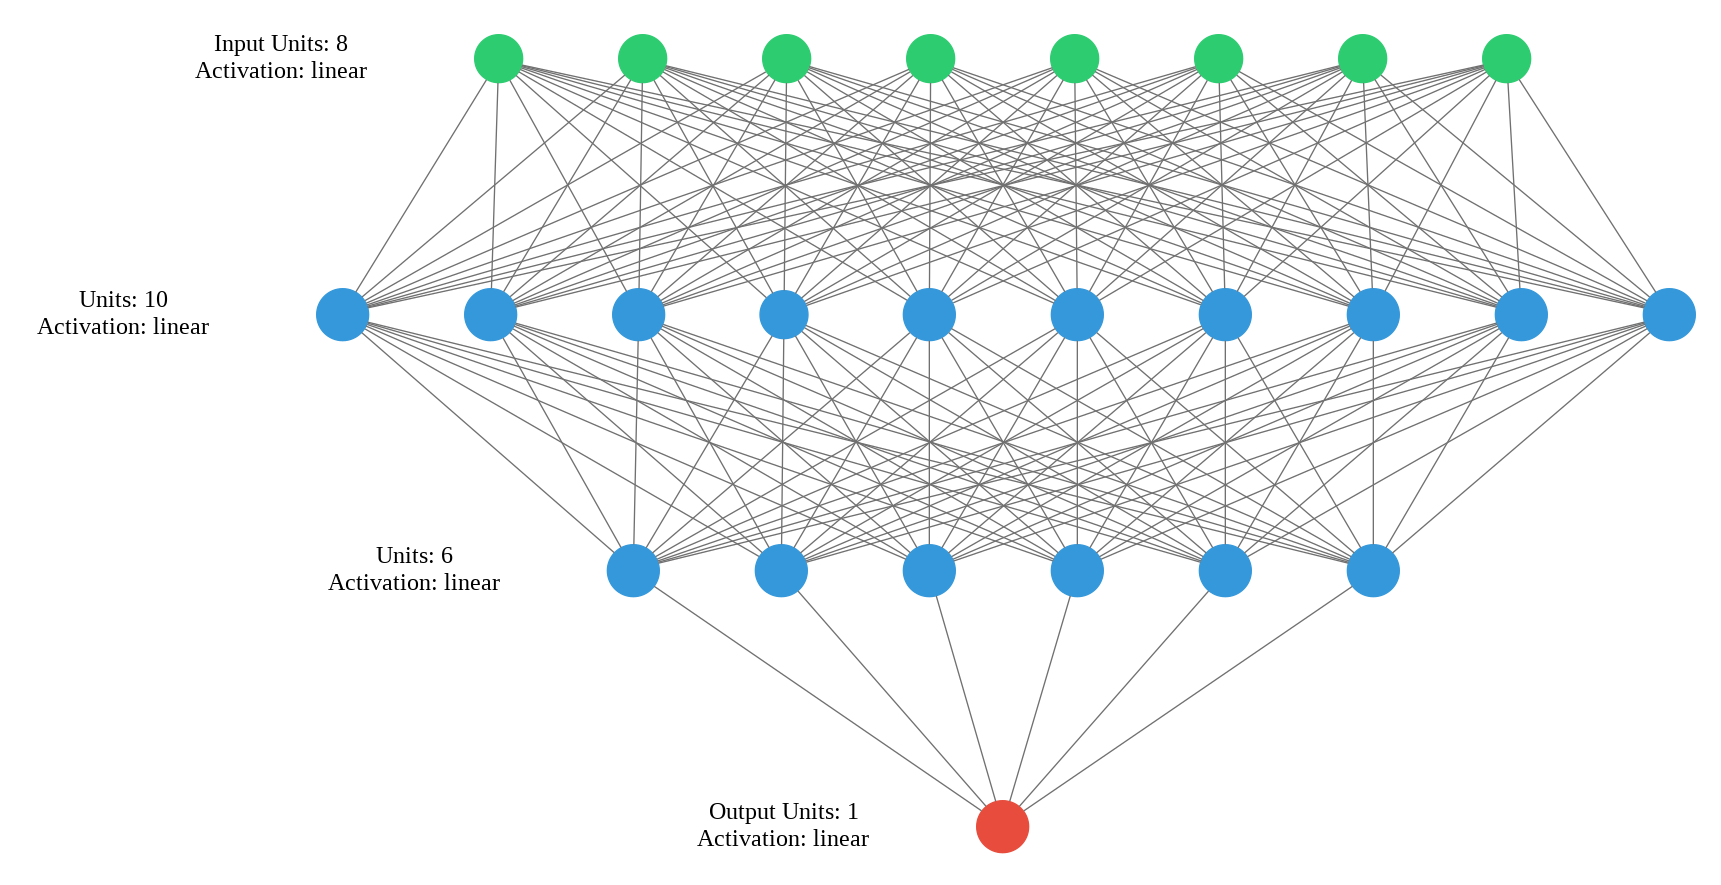

In [ ]:
visualizer(model,file_name='deeplearning',file_format='png')
Image('deeplearning.png')

### **Problem #1.2**

Now, make and visualize a NN with the following structure:
* An input layer with 3 neurons
* One hidden layer with 9 neurons
* An output layer with 4 neurons

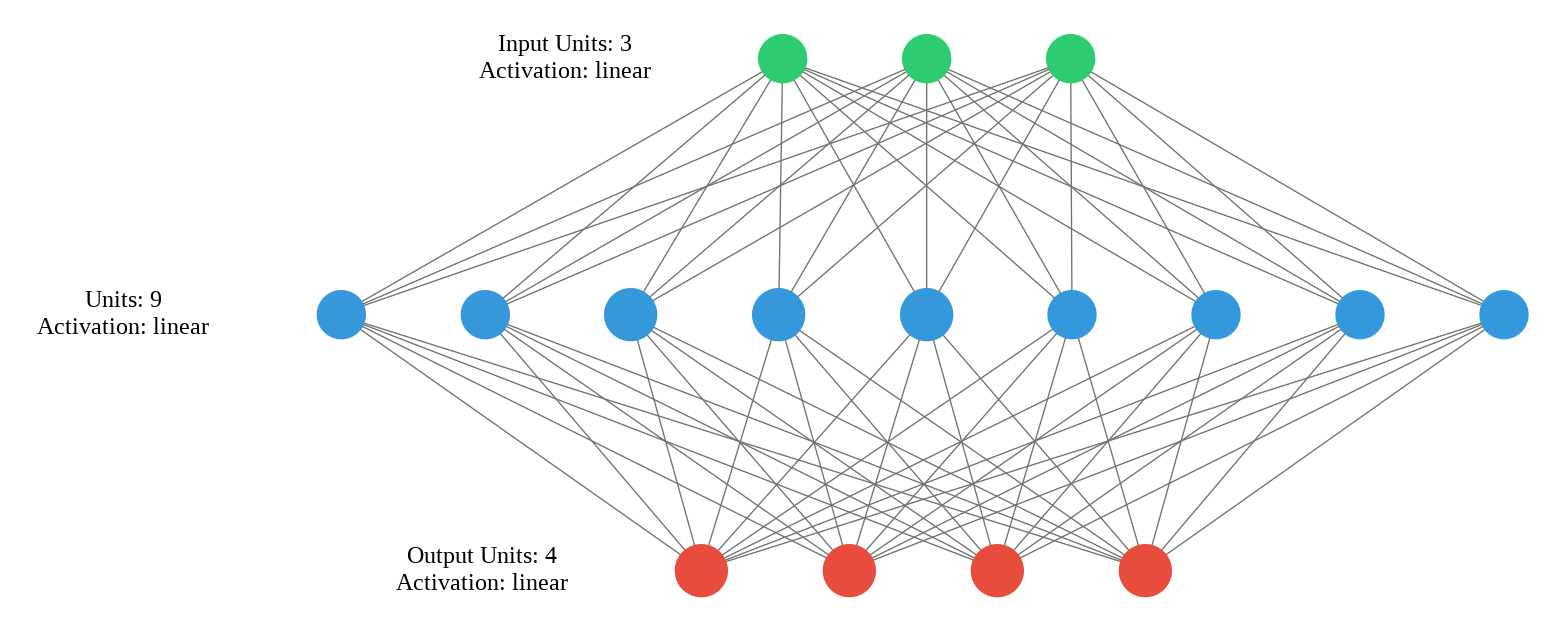

In [ ]:
model2=Sequential()
model2.add(Input(3))
model2.add(Dense(9))
model2.add(Dense(4))
visualizer(model2,file_name='deeplearning2',file_format='png')
Image('deeplearning2.png')

### **Problem #1.3**

`Sequential(...)` can also take a list of layers that you want to add. Complete the code below to recreate the same NN from problem #5.

<br>

**NOTE**: This is just a more succinct way to acheive the same thing that's worth knowing about. In the beginning, it can often be helpful to take the other approach since it emphasizes the process of building the NN layer by layer.

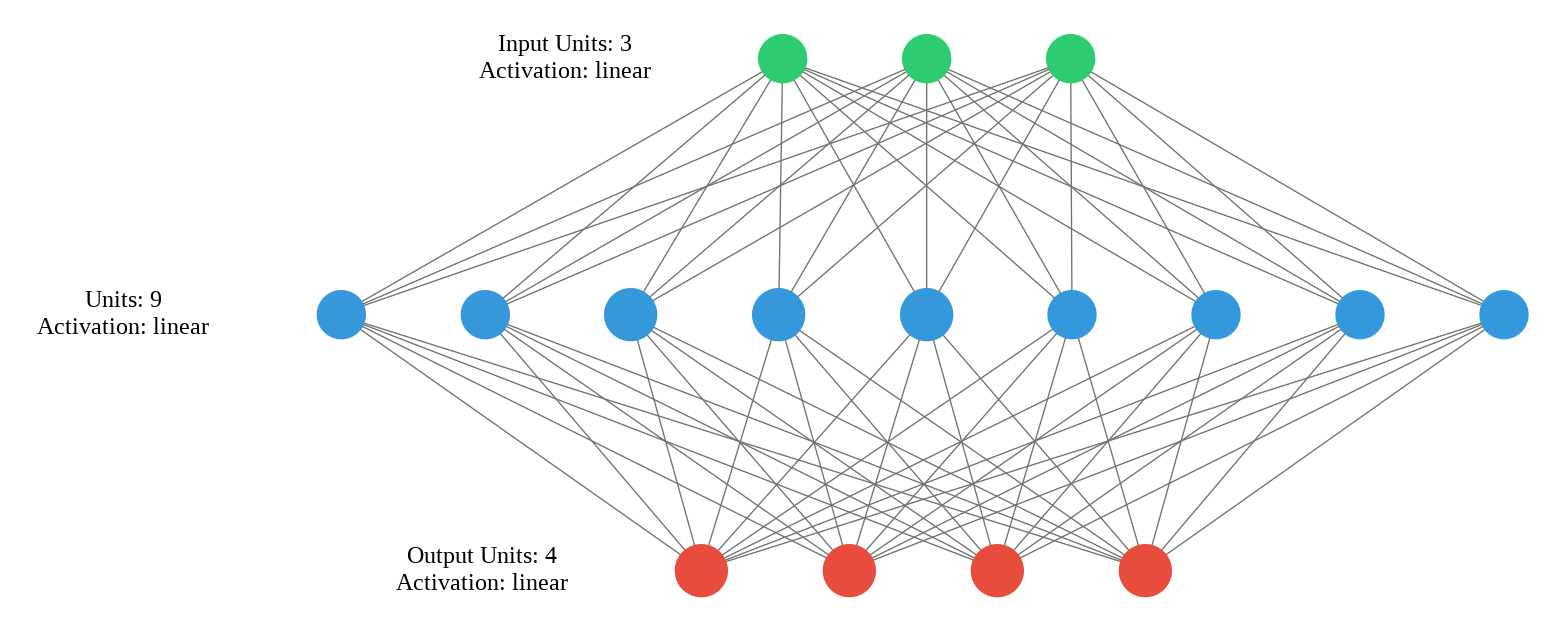

In [ ]:

model3=Sequential([Input(3),Dense(9),Dense(4)])
visualizer(model3,file_name='deeplearning3',file_format='png')
Image('deeplearning3.png')

---

<center>

### **Back to lecture**

---

<a name="p2"></a>

---
## **Part 2: Activation Functions**
---
In this part, we will expand on what we learned before by including activation functions.

### **Problem #2.1**

Create and visualize a new model with 1 hidden layer.

* The input layer should have `2` neurons

* The hidden layer should have `3` neurons with activation function: `"relu"`

* The output layer should have `4` neurons with activation function: `"relu"`

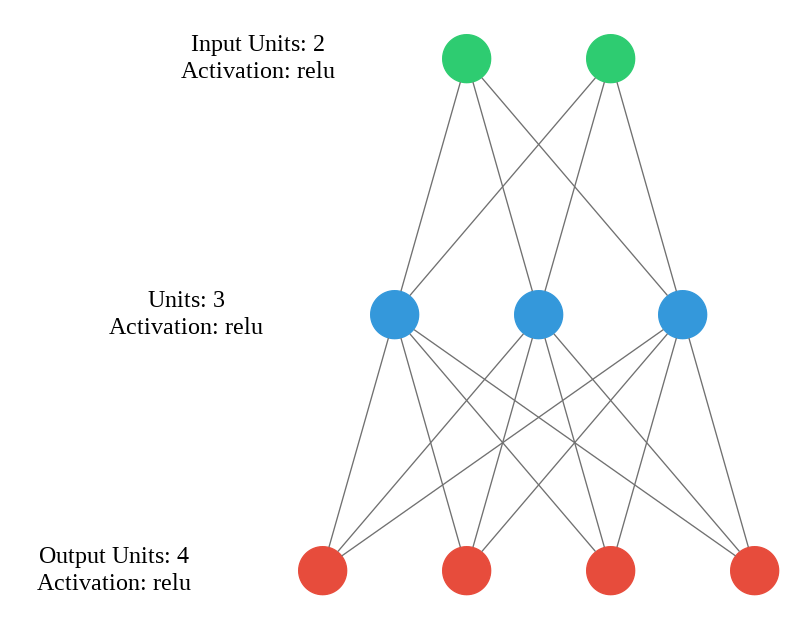

In [ ]:

model4=Sequential()
model4.add(Input(2))
model4.add(Dense(3,activation='relu'))
model4.add(Dense(4,activation='relu'))
visualizer(model4,file_name="model4",file_format='png')
Image('model4.png')

### **Problem #2.2**

Create and visualize a new model with three hidden layers.

* The input layer should have `15` neurons

* The first hidden layer should have `8` neurons with activation function : `"sigmoid"`

* The second hidden layer should have `6` neurons with activation function : `"linear"`

* The third hidden layer should have `4` neurons with activation function : `"relu"`

* The output layer should have `4` neurons

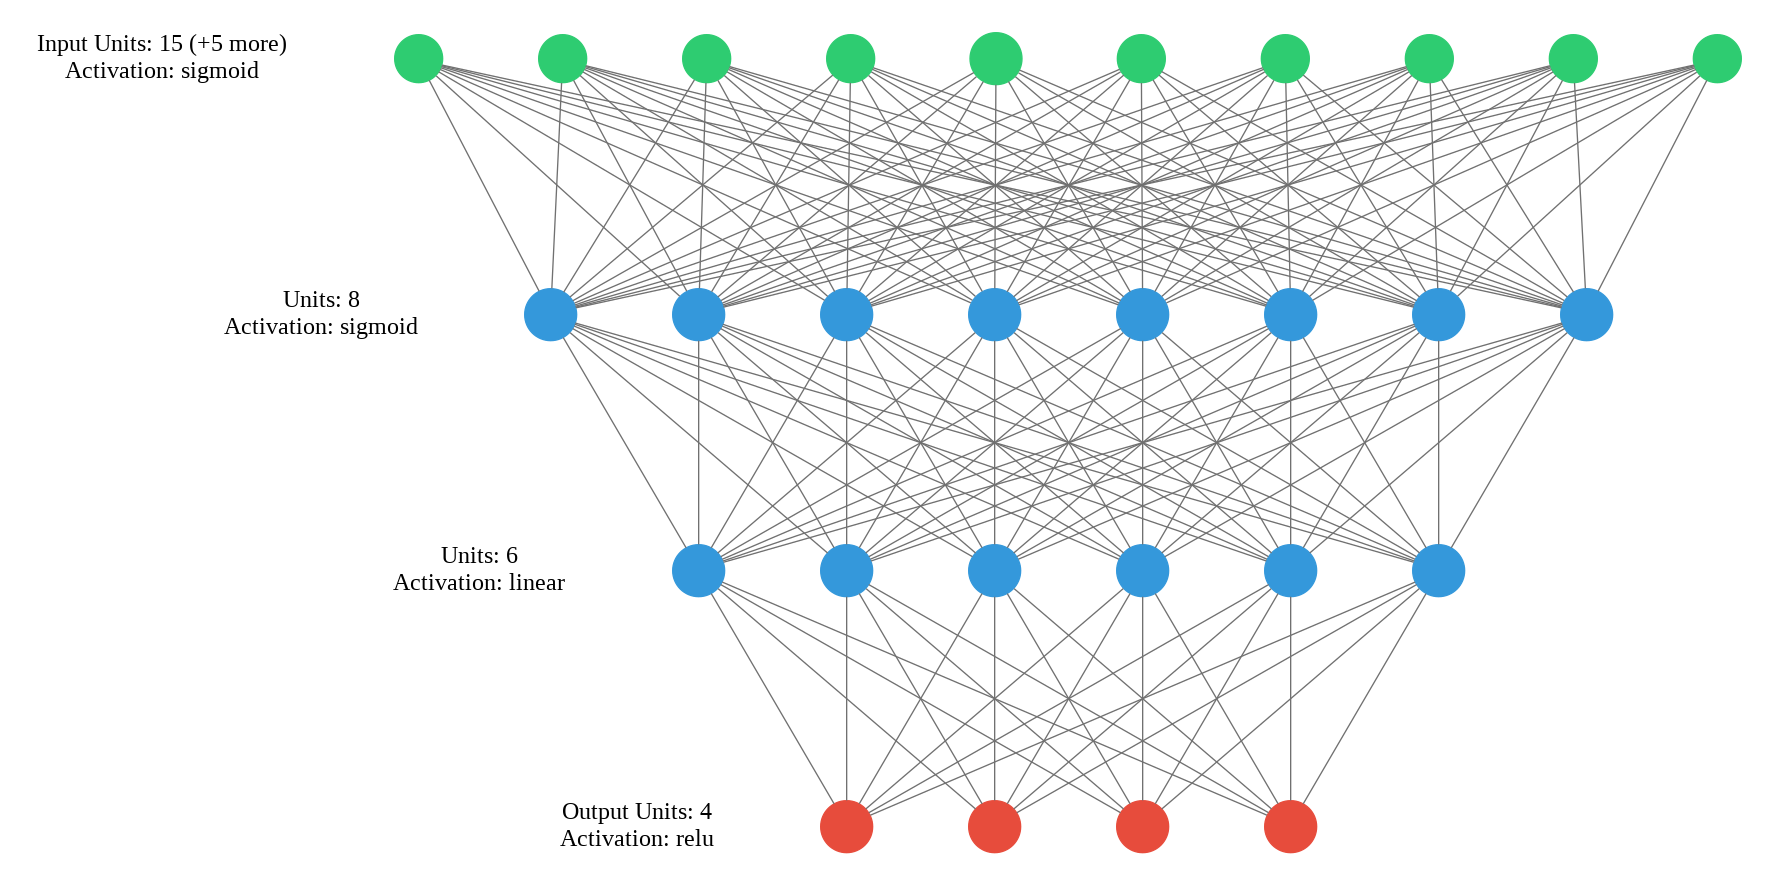

In [ ]:
model5=Sequential()
model5.add(Input(15))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(6,activation='linear'))
model5.add(Dense(4,activation='relu'))
visualizer(model5,file_name="model5",file_format='png')
Image('model5.png')

<a name = "p3"></a>

---
## **Part 3: Training**
---

In this part, we will see how to train a NN using the classic, yet problematic, Boston housing dataset.

In this part, we will walk through all steps 1 - 8:

1. **Import and split the data into a train/test set**
2. **Determine the dimensions of the data**
3. **Initialize the Network Model**
4. **Add an Input layer to the model**
5. **Add the hidden Layers to the model**
6. **Add the output layer**
7. **Fit the model**
8. **Evaluate the model**

##### **The Boston housing dataset**

For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes these 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)."

<br>

**NOTE:** The Boston housing prices dataset has a noted ethical problem: the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices.

This variable is likely due to the practice of ['Redlining'](https://www.wgbh.org/news/local-news/2019/11/12/how-a-long-ago-map-created-racial-boundaries-that-still-define-boston) from the 1930s to 1970s in Boston, which has had long lasting affects in Boston (and all around the US) still present today. The goal of the research that led to the creation of this dataset was to study the impact of air quality, but it did not give adequate demonstration of the validity of this assumption.

Please know this data set is used for *practice only* and can serve as a good example of why ethical standards are so important for ML models and implementation. [Read more](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8) on problems existing within this data set and why it is not used for anything other than practicing ML or discussing ethical problems in data science and ML.

#### **Step #1: Import and split the data into a train/test set**

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


#### **Step #2: Determine the dimensions of the data**

We will do this in two parts here: determine the overall dimensions and then determine the size of each data point.

##### **1. Overall Dimensions**

Run the code provided below to get the shape of this data. The attribute `.shape` provides the number of data points first and then the size of each data point second.

In [ ]:
x_train.shape

(404, 13)

##### **2. Size of Each Data Point**


To start building the NN, we will only need the size of each data point. Modify the code you wrote above to print just this number.

<br>

**Hint.** Accessing individual elements of tuples and lists is the same in python.

In [ ]:
number_data=x_train.shape[0]
number_columns=x_train.shape[1]
print(number_columns)

13


#### **Steps #3 - 4: Initialize NN and Add Input Layer**

Based on the problem above, initialize a sequential NN and add an input layer with the correct number of input nodes using `x_train.shape`.

In [ ]:
boston_model=Sequential()
boston_model.add(Input(number_columns))


#### **Steps #5 - 6: Finish building the NN**

Now, complete the NN as follows and then visualize it:
* one hidden layer of size 20 with activation: `"relu"`
* the output layer of size 1 with activation: `"linear"` (so that we can get a range of values out, as needed by regression)

In [ ]:
boston_model.add(Dense(20,activation='relu'))
boston_model.add(Dense(1,activation='linear'))

---

<center>

#### **Back to lecture**

---

#### **Step #7: Fit the model**

1. Set which optimizer you'd like to use to update the weights. We will use the Keras [Adam Optimizer](https://keras.io/api/optimizers/adam/) with a learning rate of `0.001`.


2. Compile the model. This is where we configure the model for training, inluding the loss function for optimization and the metric for evaluation after training. We will use the `"mean_squared_error"` for the loss and the `mse` (also the mean squared error) as our evaluation metric since this is a regression problem.


3. Lastly we need to fit our model to the data. At this point we must set the number of training epochs, which is how many times we want to update the model.

<br>

**Note:** There are many calculations needed to train a neural network and it may take a few minutes. Please be patient!


In [ ]:
# 1. Set the Optimizer and Learning Rate

opt=Adam(learning_rate=0.001)

# 2. Compile the DNN
boston_model.compile(optimizer=opt,loss='mean_squared_error',metrics=[mse])

# 3. Fit the model
training_history=boston_model.fit(x_train,y_train,epochs=1000,verbose=False)


#### **Step #8: Evaluate and test the model**

After training our models, it's always important to get a sense of how well they've learned. So, let's evaluate and test our model! Specifically,

1. Evaluate the model on the test set
2. Plot the actual vs. predicted values


##### **1.** Evaluate the model on the test set by completing the code below.

In [ ]:
boston_model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 26.1524 - mean_squared_error: 26.1524


[26.15241241455078, 26.15241241455078]

##### **2.** Plot the actual vs. predicted value by completing the code below.

4/4 [==============================] - 0s 3ms/step


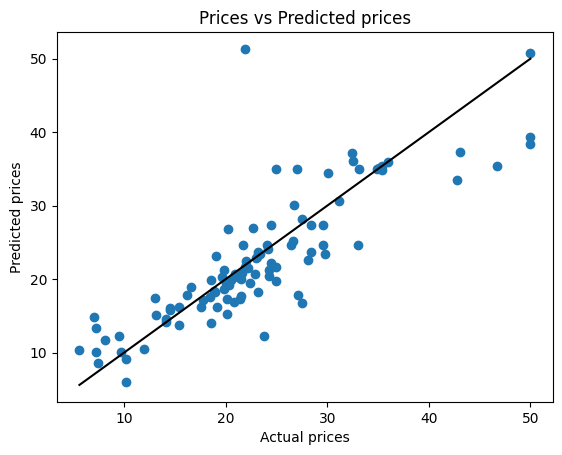

In [ ]:
plt.scatter(y_test,boston_model.predict(x_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

plt.show()

#### **Problem #3.1**

Now repeat the process above with a neural net of the same shape (number of layers/neurons), but with hidden layer activation function as "sigmoid" instead of "relu". Part of the challenge here is knowing what to change and what to keep and then fitting it all into the cell below.

<br>

**NOTE**: This will look like a lot of code, but almost all of it will be identical to what you have done above!

4/4 [==============================] - 0s 3ms/step


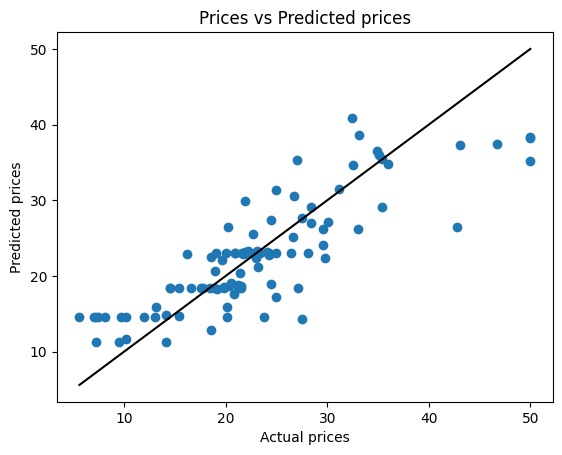

In [ ]:

# 3. Fit the model
training_history=boston_model.fit(x_train,y_train,epochs=1000,verbose=False)
# Steps 3 - 6: Building
#======================
# COMPLETE THE CODE HERE TO BUILD THE NN
model_boston=Sequential()
# Input Layer
model_boston.add(Input(x_train.shape[1]))

# Hidden Layer
model_boston.add(Dense(20, activation='sigmoid'))

# Output Layer
model_boston.add(Dense(1, activation='linear'))

# Visualizing the network
visualizer(model_boston, file_name="model_boston",file_format='png')
Image("model_boston.png")


# Step 7: Fitting
#================
# COMPLETE THE CODE HERE TO FIT THE NN TO THE TRAINING DATA
opt = Adam(learning_rate=0.001)
#ompile the DNN
model_boston.compile(optimizer=opt,loss='mean_squared_error',metrics=[mse])
# 3. Fit the model
training_history=model_boston.fit(x_train,y_train,epochs=1000,verbose=False)

# Step 8: Evaluating
#===================
# COMPLETE THE CODE HERE TO EVALUTE AND VISUALIZE THE MODEL
plt.scatter(y_test, model_boston.predict(x_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black')

plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

plt.show()

<a name = "p4"></a>

---
## **Part 4: Independent Work**
---

### **Problem #4.1: Start building the NN**

Create a new model with `28` input neurons.



In [ ]:
model = Sequential()
model.add(Input(28))

### **Problem #4.2: Finish building the NN**

Now, add two hidden layers. The first hidden layer should have `75` neurons. The second hidden layer should have `25` neurons.

Then, add the output layer with `10` neurons.

Lastly, visualize the model.

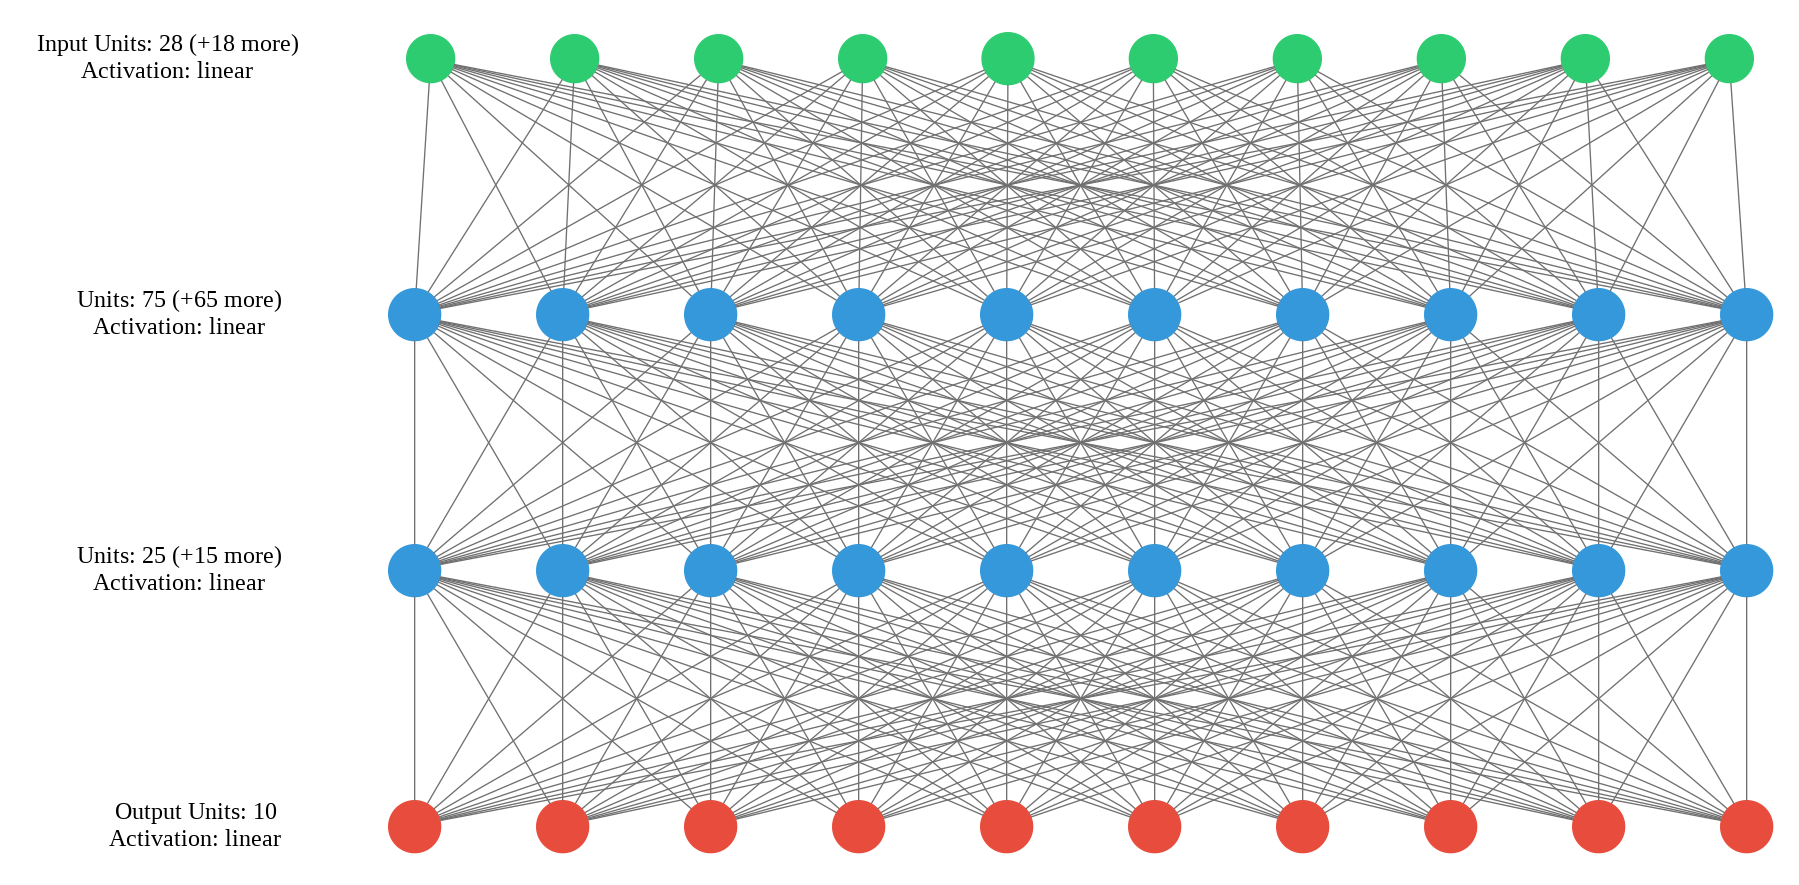

In [ ]:
model.add(Dense(75))
model.add(Dense(25))

#Output layer
model.add(Dense(10))
visualizer(model,file_name='final',file_format='png')
Image('final.png')

### **Problem #4.3: Build your model**

Create a new model with one hidden layer. The input data will have a size of `100`. The first hidden layer should have `50` neurons with activation function : `"Linear"`. The output layer should have `2` neurons with activation function : `"Linear"`.

In [ ]:
model = Sequential()
model.add(Input(100))
model.add(Dense(50, activation='linear'))
model.add(Dense(2,activation ='linear'))


### **Problem #4.4: Visualize your model**

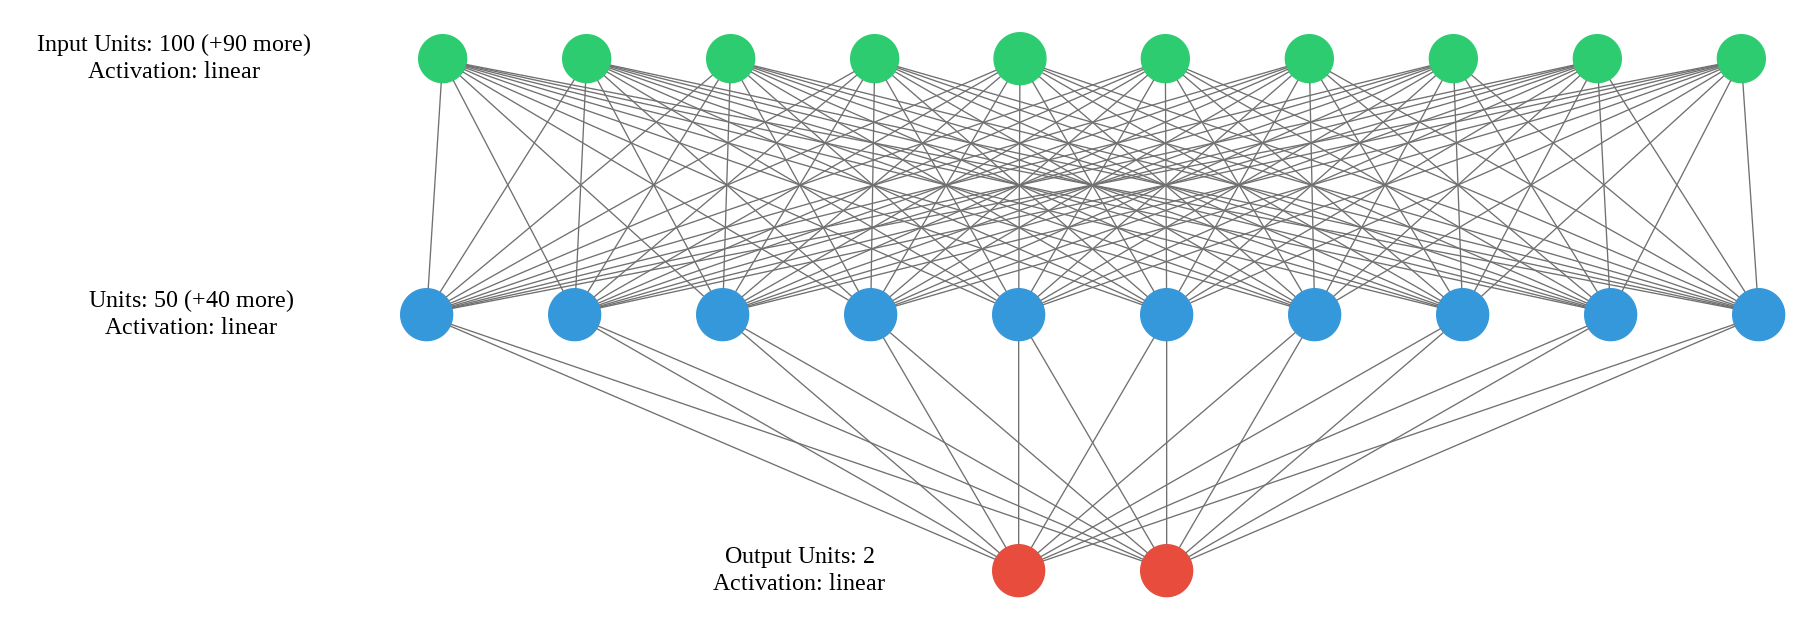

In [ ]:
visualizer(model,file_name='final1',file_format='png')
Image('final1.png')

#End of notebook
---
© 2023 The Coding School, All rights reserved